In [1]:
import numpy as np
from numpy import random

from matplotlib import pyplot as plt
import math
from math import hypot

from itertools import cycle

from sklearn.cluster import DBSCAN

import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

import cv2

In [2]:
def Method_OpticalFlowDepthMap(image1_jpg, image2_jpg):
    vec_optical_flow = cv2.calcOpticalFlowFarneback(image1_jpg, image2_jpg, None, 0.5, 3, 20, 10, 5, 1.2, 0)
    module_vector_speed, angular_vec_speed = cv2.cartToPolar(vec_optical_flow[..., 0], vec_optical_flow[..., 1])
    return vec_optical_flow, module_vector_speed, angular_vec_speed

In [3]:
def plot(title_str, image, index):
    plt.subplot(2, 2, index)
    plt.title(title_str)
    plt.imshow(image, 'gray')
    plt.gca().get_xaxis().set_visible(False)
    plt.gca().get_yaxis().set_visible(False)

In [4]:
def convert_ply(points):
    with open(r'E:\BKP(mag)\Habr\points.ply', 'w') as f:
        f.write('ply\n')
        f.write('format ascii 1.0\n')
        f.write('element vertex {}\n'.format(len(points)))
        f.write('property float x\n')
        f.write('property float y\n')
        f.write('property float z\n')
        f.write('end_header\n')
        for point in points:
            f.write('{:.2f} {:.2f} {:.2f}\n'.format(point[0], point[2], point[1]))

In [5]:
f = 300   # раз мы занимаемся визуализацией, фокус я все-таки подобрал так, чтобы сцена выглядела условно реальной
B = 1
w = 852
h = 480

img1 = cv2.imread(r'E:\BKP(mag)\Habr\1.jpg', 0)
img2 = cv2.imread(r'E:\BKP(mag)\Habr\2.jpg', 0)

flow = cv2.calcOpticalFlowFarneback(img1, img2, None, 0.5, 3, 20, 10, 5, 1.2, 0)
mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])

edges = cv2.Canny(img1, 100, 200)

result = []
for y in range(img1.shape[0]):
    for x in range(img1.shape[1]):
        if edges[y, x] == 0:
            continue
        delta = mag[y, x]
        if delta == 0:
            continue
        Z = (B * f) / delta
        X = (Z * (x - w / 2.)) / f
        Y = (Z * (y - h / 2.)) / f
        point = np.array([X, Y, Z])
        result.append(point)

result = np.vstack(result)


def dump2ply(points):
    # сохраняем в формат .ply, чтобы потом открыть Блендером
    with open('points.ply', 'w') as f:
        f.write('ply\n')
        f.write('format ascii 1.0\n')
        f.write('element vertex {}\n'.format(len(points)))
        f.write('property float x\n')
        f.write('property float y\n')
        f.write('property float z\n')
        f.write('end_header\n')
        for point in points:
            f.write('{:.2f} {:.2f} {:.2f}\n'.format(point[0], point[2], point[1]))

dump2ply(result)

In [6]:
B_step = 1
w_width = 1920
h_heigth = 1080
f_focalLength = 250

result_proccesingPoints = []

image1_jpg = cv2.imread(r'E:\BKP(mag)\Habr\1.jpg', 0)
image2_jpg = cv2.imread(r'E:\BKP(mag)\Habr\2.jpg', 0)

vec_optical_flow = cv2.calcOpticalFlowFarneback(image1_jpg, image2_jpg, None, 0.5, 3, 20, 10, 5, 1.2, 0)
module_vector_speed, angular_vec_speed = cv2.cartToPolar(vec_optical_flow[..., 0], vec_optical_flow[..., 1])

conture = cv2.Canny(image1_jpg, 100, 200)

for y in range(image1_jpg.shape[0]):
    for x in range(image1_jpg.shape[1]):
        if conture[y, x] == 0:
            continue
        delta = angular_vec_speed[y, x]
        if delta == 0:
            continue
        Z_axes = (B * f_focalLength) / delta
        X_axes = (Z * (x - h_heigth / 2.)) / f_focalLength
        Y_axes = (Z * (y - h_heigth / 2.)) / f_focalLength
        tmp_point = np.array([X_axes, Y_axes, Z_axes])
        result_proccesingPoints.append(tmp_point)
        
for y in range(image1_jpg.shape[0]):
    for x in range(image1_jpg.shape[1]):
        if conture[y, x] == 0:
            continue
        delta = module_vector_speed[y, x]
        if delta == 0:
            continue
        Z_axes = (B * f_focalLength) / delta
        X_axes = (Z * (x - h_heigth / 2.)) / f_focalLength
        Y_axes = (Z * (y - h_heigth / 2.)) / f_focalLength
        tmp_point = np.array([X_axes, Y_axes, Z_axes])
        result_proccesingPoints.append(tmp_point)
        
for y in range(image1_jpg.shape[0]):
    for x in range(image1_jpg.shape[1]):
        if conture[y, x] == 0:
            continue
        #delta = module_vector_speed[y, x]
        #if delta == 0:
            #continue
        Z_axes = (B * f_focalLength) / delta
        X_axes = (Z * (x - h_heigth / 2.)) / f_focalLength
        Y_axes = (Z * (y - h_heigth / 2.)) / f_focalLength
        tmp_point = np.array([X_axes, Y_axes, Z_axes])
        result_proccesingPoints.append(tmp_point)

result_proccesingPoints = np.vstack(result_proccesingPoints)

In [7]:
points_2d = []
for y in range(image1_jpg.shape[0]):
    for x in range(image1_jpg.shape[1]):
        if conture[y, x] == 0:
            continue
        #delta = module_vector_speed[y, x]
        #if delta == 0:
            #continue
        Z_axes = (B * f_focalLength) / delta
        X_axes = (Z * (x - h_heigth / 2.)) / f_focalLength
        Y_axes = (Z * (y - h_heigth / 2.)) / f_focalLength
        tmp_point = np.array([X_axes, Y_axes, Z_axes])
        points_2d.append(tmp_point)

In [8]:
convert_ply(points_2d)

In [9]:
len(result_proccesingPoints)

16878

In [10]:
result_proccesingPoints[0]

array([-68.30356559, -68.43028835,  70.87267236])

In [11]:
filtered_points = []
for i in range(len(result_proccesingPoints)):
    if(23 <= result_proccesingPoints[i][2] <= 91):
        filtered_points.append(result_proccesingPoints[i])

In [12]:
convert_ply(filtered_points)

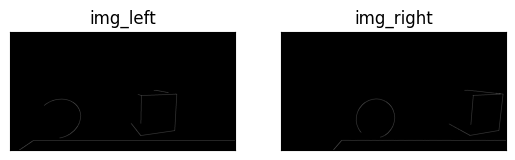

In [28]:
conture1 = cv2.Canny(image1_jpg, 100, 200)
conture2 = cv2.Canny(image2_jpg, 100, 200)

plot('img_left', conture1, 1)
plot('img_right', conture2, 2)

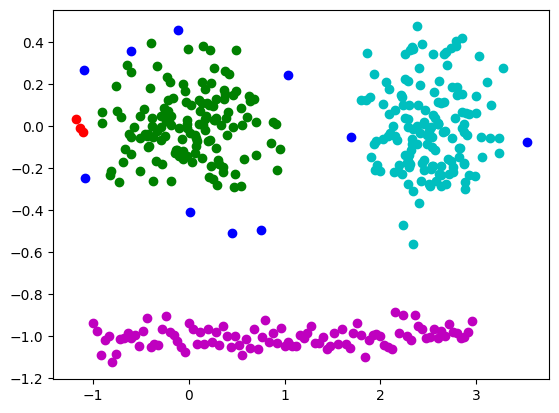

In [197]:
def distance2D(point1, point2):
        return math.sqrt((point2[0] - point1[0])**2 + (point2[1] - point1[1])**2)
    
def find_neighbours(points_set, point1, eps):
    neighbours = []
    for point2 in points_set:
        if distance2D(point1, point2) < eps:
            neighbours.append(point2)
    return neighbours

def update_cluster(p, neighbours, clusters, clustered_points, visited_points, eps, m, points_set, NOISE, C):
    if C not in clusters:
        clusters[C] = []
    clusters[C].append(p)
    clustered_points.add(p)
    while neighbours:
        q = neighbours.pop()
        if q not in visited_points:
            visited_points.add(q)
            neighbourz = find_neighbours(points_set, q, eps)
            if len(neighbourz) > m:
                neighbours.extend(neighbourz)
        if q not in clustered_points:
            clustered_points.add(q)
            clusters[C].append(q)
            if q in clusters[NOISE]:
                clusters[NOISE].remove(q)

def dbscan_naive(points_set, eps, m, distance2D):
    NOISE = 0
    C = 1
    visited_points = set()
    clustered_points = set()
    clusters = {NOISE: []}

    for point1 in points_set:
        if point1 in visited_points:
            continue
        visited_points.add(point1)
        neighbours = find_neighbours(points_set, point1, eps)
        if len(neighbours) < m:
            clusters[NOISE].append(point1)
        else:
            C += 1
            update_cluster(point1, neighbours, clusters, clustered_points, visited_points, eps, m, points_set, NOISE, C)

    return clusters

if __name__ == "__main__":
    P = [(random.randn()/2, random.randn()/6) for i in range(150)]
    P.extend([(random.randn()/3 + 2.5, random.randn()/5) for i in range(150)])
    P.extend([(i/25 - 1, + random.randn()/20 - 1) for i in range(100)])
    clusters = dbscan_naive(P, 0.2, 4, lambda x, y: hypot(x[0] - y[0], x[1] - y[1]))
    for c, points in zip(cycle('bgrcmykgrcmykgrcmykgrcmykgrcmykgrcmyk'), clusters.values()):
        X = [p[0] for p in points]
        Y = [p[1] for p in points]
        plt.scatter(X, Y, c=c)
    plt.show()

In [239]:
dbscan = DBSCAN(eps = 8, min_samples = 20)
dbscan.fit(points_2d)

labels = dbscan.labels_

In [240]:
unique_labels = np.unique(labels)
unique_labels

array([0], dtype=int64)

In [241]:
def find_eps():
    random_eps_arr = np.random.randint(0, 101, size=1000)
    for epsilon in random_eps_arr: 
        dbscan = DBSCAN(eps = epsilon, min_samples = 20)
        dbscan.fit(points_2d)
        labels = dbscan.labels_
        unique_labels = np.unique(labels)
        if(len(unique_labels) == 4):
            return epsilon
        
epsilon = find_eps()
epsilon

2

In [242]:
dbscan = DBSCAN(eps = epsilon, min_samples = 20)
dbscan.fit(points_2d)
labels = dbscan.labels_
unique_labels = np.unique(labels)

clusters = [[] for _ in range(0, len(unique_labels + 1))]

for i in range(len(labels)):
    label = labels[i]
    clusters[label - 1].append(points_2d[i])
    
for i in range(len(clusters)):
    clusters[i] = np.array(clusters[i])  

In [243]:
len(clusters)

4

In [257]:
convert_ply(clusters[1])

In [251]:
len(clusters[0])

1174

In [252]:
max_x = max(point[0] for point in clusters[0])
min_x = min(point[0] for point in clusters[0])

max_z = max(point[1] for point in clusters[0])
min_z = min(point[1] for point in clusters[0])

In [254]:
for i in range(len(filtered_points)):
    if(min_z <= filtered_points[i][1] <= max_z and min_x <= filtered_points[i][0] <= max_x):
        clusters[0] = np.concatenate([clusters[0], [filtered_points[i]]])

In [255]:
len(clusters[0])

3460

In [256]:
convert_ply(clusters[0])